# Final Project - Travel Recommendations

##### Import Libraries

In [151]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import getpass
from __future__ import print_function
import json
import sys
from random import randint
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns', None)
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestCentroid
from datetime import datetime

In [2]:
# Which cities I can visit that is similar to others? 

#### CITY DATASET

In [739]:
city_data = pd.read_csv('csvData.csv')
city_final = city_data[:800]

In [740]:
city_list = city_data["Name"].tolist()[800:1170]

In [5]:
country_list = city_final['Country'].unique().tolist()

#### COUNTRY INFORMATION

In [835]:
currencies = pd.read_json("country-by-currency-name.json")

In [854]:
language = pd.read_excel("Language List by Country and Place.xlsx")

In [855]:
country = pd.merge(left = city_final, right = currencies, how = 'left', left_on = "Country", right_on= "country")
country = country.drop(['country'], axis=1)
country_final = pd.merge(left = country, right = language, how = 'left', left_on = "Country", right_on= "Country")

#### WEATHER API

In [153]:
key = getpass.getpass()

········


In [902]:
# key_idx = 0
# count = 0

# def nextKey():
#     global key_idx, count
    
#     count = 0
#     key_idx = key_idx + 1
#     if key_idx > len(keys)-1:
#         key_idx = 0
        
#     print('Changing to key idx [%i]' % key_idx)

# def getWeather(city, month):
#     global key_idx, count

#     try:
#         response = requests.get(
#             url="https://api.worldweatheronline.com/premium/v1/past-weather.ashx",
#             params={
#                 "key": keys[key_idx],
#                 "type": "city",
#                 "q": city,
#                 "format": "json",
#                 "date": "%s-01" % month,
#                 "enddate": "%s-30" % month,
#                 "tp": "24",
#             },
#         ).json()
        
#         if 'error' in response['data']:
#             print("Error in [%s]: %s" % (city, response['data']))
#             if 'API key has reached calls per day' in response['data']['error'][0]['msg']:
#                 nextKey()
#                 return getWeather(city=city, month=month)
        
#         count = count + 1
#         if count == 500:
#             nextKey()
        
#         return response
    
#     except requests.exceptions.RequestException:
#         print('HTTP Request failed')

        
# columns = ['date', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination', 
#            'maxtempC', 'mintempC', 'avgtempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 
#            'windspeedKmph', 'winddirDegree', 'winddir16Point', 'precipMM', 'humidity', 
#            'visibility', 'pressure', 'cloudcover', 'HeatIndexC', 'DewPointC', 
#            'WindChillC', 'WindGustKmph']
# weather_df = pd.DataFrame(columns=['city'] + columns)

# dates = ['2020-01',
#         '2020-03',
#         '2020-04',
#         '2020-05',
#         '2020-06',
#         '2020-07',
#         '2020-08',
#         '2020-09',
#         '2020-10',
#         '2020-11',
#         '2020-12',
#         '2021-01',
#         '2021-02',
#         '2021-03',
#         '2021-04',
#         '2021-05',
#         '2021-06',
#         '2021-07',
#         '2021-08',
#         '2021-09']

# for city in city_list_usa:
#     print('Fetching from city [%s]' % city)
#     stop = False
#     for date in dates:
#         weather = getWeather(city=city, month=date)
        
#         if 'error' in weather['data']:
#             print("Error in [%s]: %s" % (city, weather['data']))
#             if 'API key has reached calls per day' in weather['data']['error'][0]['msg']:
#                 stop = True
                
#             if stop == True:
#                 break
#             else:
#                 continue
            
#         weather = weather['data']['weather']

#         for item in weather:
#             row = {'city': city}
#             for column in columns:
#                 if column in item:
#                     row[column] = item[column]
#                 elif column in item['hourly'][0]:
#                     row[column] = item['hourly'][0][column]
#                 elif column in item['astronomy'][0]:
#                     row[column] = item['astronomy'][0][column]
#                 else:
#                     print('Column [%s] not found on item [%s]' % (column, item))
            
#             weather_df = weather_df.append(row, ignore_index=True)
#     if stop == True:
#         break
#     sleep(1)  
# weather_df

##### Different tables for Requests

In [743]:
# Different datasert, because I need to download in parts, and cleaning some rows, duplicate
weather_01 = pd.read_csv("weather_01.csv")
#weather_01.to_csv("weather_01.csv")
weather_02 = pd.read_csv("weather_02.csv")
#weather_02.to_csv("weather_02.csv")
weather_03 = pd.read_csv("weather_03.csv")
#weather_03.to_csv("weather_03.csv")
weather_04 = pd.read_csv("weather_04.csv")
#weather_04.to_csv("weather_04.csv")
weather_05 = pd.read_csv("weather_05.csv")
#weather_05.to_csv("weather_05.csv")
weather_06 = pd.read_csv("weather_06.csv")
#weather_06.to_csv("weather_06.csv")
weather_07 = pd.read_csv("weather_07.csv")
#weather_07.to_csv("weather_07.csv")
weather_08 = pd.read_csv("weather_08.csv")
#weather_08.to_csv("weather_08.csv")
weather_09 = pd.read_csv("weather_09.csv")
#weather_09.to_csv("weather_09.csv")
weather_10 = pd.read_csv("weather_10.csv")
#weather_10.to_csv("weather_10.csv")

##### Create a unique table

In [838]:
#weather_days = pd.concat([weather_01, weather_02, weather_03, weather_04, weather_05, weather_06, weather_07, weather_08, weather_09, weather_10], ignore_index=True)

In [766]:
weather_days=weather_days.drop(["Unnamed: 0"] , axis=1)

In [903]:
#weather_days.dtypes

In [769]:
weather_days['moon_illumination'] = weather_days['moon_illumination'].astype(int)
weather_days['maxtempC'] = weather_days['maxtempC'].astype(int)
weather_days['mintempC'] = weather_days['mintempC'].astype(int)
weather_days['avgtempC'] = weather_days['avgtempC'].astype(int)
weather_days['totalSnow_cm'] = weather_days['totalSnow_cm'].astype(float)
weather_days['sunHour'] = weather_days['sunHour'].astype(float)
weather_days['uvIndex'] = weather_days['uvIndex'].astype(int)
weather_days['windspeedKmph'] = weather_days['windspeedKmph'].astype(int)
weather_days['winddirDegree'] = weather_days['winddirDegree'].astype(int)
weather_days['precipMM'] = weather_days['precipMM'].astype(float)
weather_days['humidity'] = weather_days['humidity'].astype(int)
weather_days['visibility'] = weather_days['visibility'].astype(int)
weather_days['pressure'] = weather_days['pressure'].astype(int)
weather_days['cloudcover'] = weather_days['cloudcover'].astype(int)
weather_days['HeatIndexC'] = weather_days['HeatIndexC'].astype(int)
weather_days['DewPointC'] = weather_days['DewPointC'].astype(int)
weather_days['WindChillC'] = weather_days['WindChillC'].astype(int)
weather_days['WindGustKmph'] = weather_days['WindGustKmph'].astype(int)

In [770]:
weather_days['year'] = pd.DatetimeIndex(weather_days['date']).year
weather_days['month'] = pd.DatetimeIndex(weather_days['date']).month

In [866]:
weather_country = pd.merge(left = weather_days,
                                  right = country_final,
                                  how = 'left', 
                                  left_on = "city", 
                                  right_on= "Name")

weather_country = weather_country.drop(['rank','Name','Prev','Growth'], axis=1)


In [867]:
weather_country.to_csv("weather_country.csv")
column_names = ['city','Country', 'Population', 'currency_name', 'Language ','date', 'year', 'month','sunset', 
                'moonrise', 'moonset', 'moon_phase',
                'moon_illumination', 'maxtempC', 'mintempC', 'avgtempC', 'totalSnow_cm',
                'sunHour', 'uvIndex', 'windspeedKmph', 'winddirDegree',
                'winddir16Point', 'precipMM', 'humidity', 'visibility', 'pressure',
                'cloudcover', 'HeatIndexC', 'DewPointC', 'WindChillC', 'WindGustKmph']

weather_country = weather_country.reindex(columns=column_names)
weather_country.columns = weather_country.columns.str.lower()
weather_country = weather_country.rename({'language ':'language'})

In [868]:
#Creatig the table to do the predictions

In [869]:
weather_country_monthly = weather_country.groupby(['month','year', 'city', 'country','currency_name','language ']).mean().round(0).reset_index() 

In [880]:
#Decided to cut some cities in China and India, because are to many, and this make some noise in my dataset
#china_cities= weather_country_monthly["city"].loc[(weather_country_monthly['country'])=="China"].tolist()
#china_cities_unique = set(china_cities)
#china_cities_unique.remove('Xi-an Shaanxi')

#india= weather_country_monthly["city"].loc[(weather_country_monthly['country'])=="India"].tolist()
#india = set(india)
#india.remove("Indore")

#weather_country_monthly = weather_country_monthly[~weather_country_monthly['city'].isin(india)].reset_index()
#weather_country_monthly = weather_country_monthly.drop(['index'], axis=1)
weather_country_monthly.to_csv("weather_country_monthly.csv", index=False)
#weather_country_monthly
#weather_country_monthly.loc[(weather_country_monthly["city"])=="London"]

## Clustering - Unsupervised Learning

In [881]:
weather_model = weather_country_monthly.select_dtypes(include=np.number)
weather_model = weather_model.drop(["month", "year", "population"],axis=1)
weather_model.to_csv("weather_model.csv", index=False)

###### MinMax

In [886]:
minmax_scaler = MinMaxScaler().fit(weather_model)
X = minmax_scaler.transform(weather_model)

X_prep = pd.DataFrame(X,columns=weather_model.columns).head()

##### Choosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

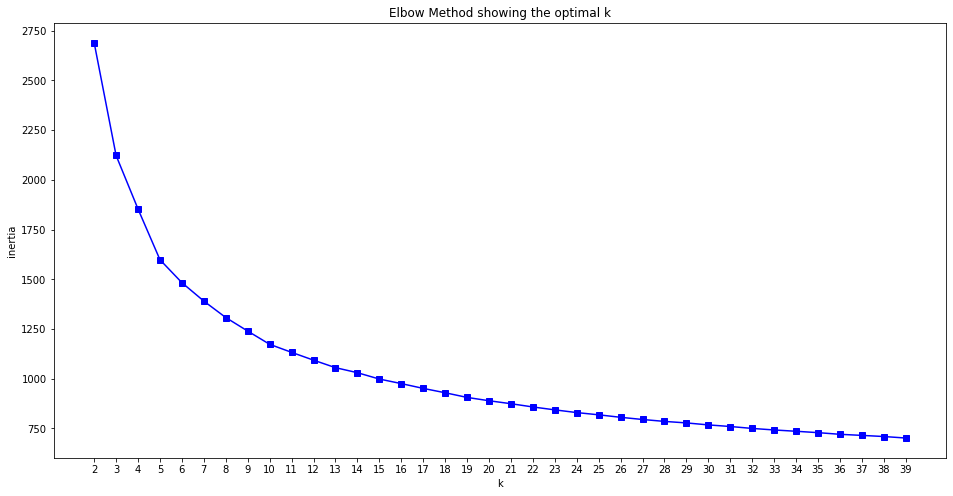

In [883]:
K = range(2, 40)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bs-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

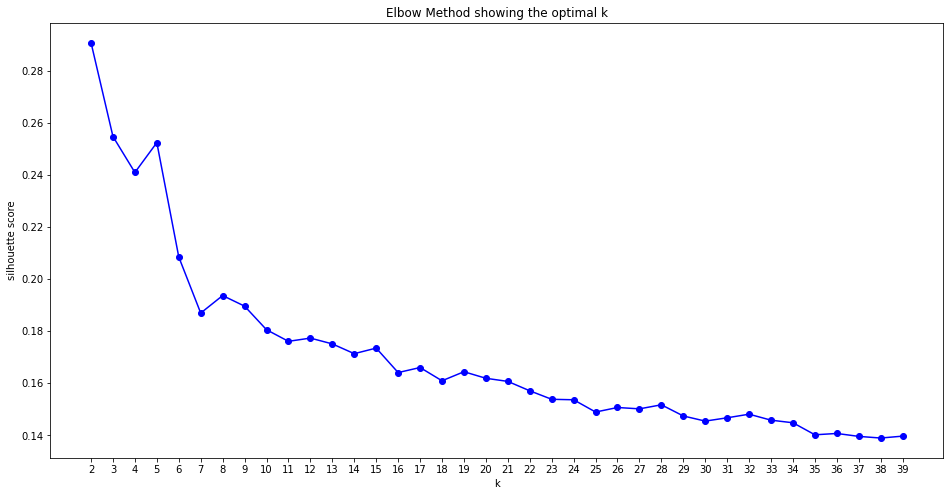

In [884]:
K = range(2, 40)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bo-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [885]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=10000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 13


##### Cluster

In [887]:
kmeans = KMeans(n_clusters=6, n_init = 50, max_iter=100, random_state = 1234)
y_kmeans = kmeans.fit_predict(X)
# Predicting / assigning the clusters:
clusters = kmeans.predict(X)
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2585
1    2123
2     923
3    1245
4     442
5    2502
dtype: int64

In [888]:
# Calculate Scores
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print(metrics.calinski_harabasz_score(X, kmeans.labels_))
print('Silhouetter Score: %.3f' % score)
print(kmeans.inertia_)
kmeans.score(X)

2906.0563963921163
Silhouetter Score: 0.209
1483.1015490815364


-1483.1015490815362

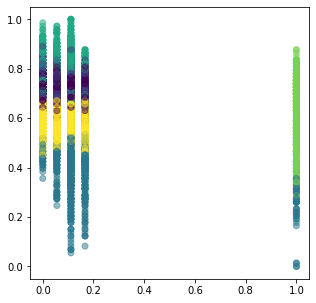

In [889]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=clusters, alpha=0.5)
plt.show()

In [ ]:
#testing other models, but seems that KMEANs perform better

In [890]:
# agglomerative clustering
from numpy import unique
from sklearn.cluster import AgglomerativeClustering

# define the model
ac = AgglomerativeClustering(n_clusters=6)
# fit model and predict clusters
cluster_ac = ac.fit_predict(X)
labels_ac = ac.labels_
print(metrics.silhouette_score(X, labels_ac, metric='euclidean'))
pd.Series(cluster_ac).value_counts().sort_index()


0.16656051702473598


0    2442
1    2851
2     573
3     367
4    2444
5    1143
dtype: int64

In [891]:
# birch clustering
from sklearn.cluster import Birch

# define the model
birch = Birch(threshold=0.01, n_clusters=6)
# fit the model
birch.fit(X)
# assign a cluster to each example
cluster_birch = birch.predict(X)
labels_birch = birch.labels_
print(metrics.silhouette_score(X, labels_birch, metric='euclidean'))
pd.Series(cluster_birch).value_counts().sort_index()

0.21840243671713022


0    3305
1    3237
2    1661
3    1126
4     367
5     124
dtype: int64

##### Testing Scalers (Stand, MinMax scaler and Robutscaler)

In [892]:
minmax_scaler = MinMaxScaler().fit(weather_model)

X1 = minmax_scaler.transform(weather_model)
X1_prep = pd.DataFrame(X1,columns=weather_model.columns).head()
kmeans1 = KMeans(n_clusters=7, n_init = 100, max_iter=1000, random_state = 1234)
y_kmeans = kmeans.fit_predict(X1)

# Predicting / assigning the clusters:
clusters = kmeans.predict(X1)

# Calculate Scores
score = silhouette_score(X1, kmeans.labels_, metric='euclidean')
print(metrics.calinski_harabasz_score(X1, kmeans.labels_))
print('Silhouetter Score: %.3f' % score)
print(kmeans.inertia_)
print(kmeans.score(X1))

# Check the size of the clusters
#pd.Series(clusters).value_counts().sort_index()

2906.0563963921163
Silhouetter Score: 0.209
1483.1015490815364
-1483.1015490815362


In [893]:
scaler = StandardScaler().fit(weather_model)

X2 = scaler.transform(weather_model)
X_prep2 = pd.DataFrame(X2,columns=weather_model.columns).head()

kmeans2 = KMeans(n_clusters=6, n_init = 50, max_iter=1000, random_state = 1234)
y_kmeans2 = kmeans.fit_predict(X2)

# Predicting / assigning the clusters:
clusters2 = kmeans.predict(X2)

# Calculate Scores
score = silhouette_score(X2, kmeans.labels_, metric='euclidean')
print(metrics.calinski_harabasz_score(X2, kmeans.labels_))
print('Silhouetter Score: %.3f' % score)
print(kmeans.inertia_)
print(kmeans.score(X2))

# Check the size of the clusters
#print(clusters)
#pd.Series(clusters).value_counts().sort_index()

2301.1976538579506
Silhouetter Score: 0.179
81366.05722805325
-81366.05722805327


In [894]:
robut = RobustScaler().fit(weather_model)

X3 = robut.transform(weather_model)
X3_prep = pd.DataFrame(X3,columns=weather_model.columns).head()

kmeans3 = KMeans(n_clusters=7, n_init = 50, max_iter=1000, random_state = 1234)
y_kmeans3 = kmeans.fit_predict(X3)

# Predicting / assigning the clusters:
clusters = kmeans.predict(X3)

# Calculate Scores
score = silhouette_score(X3, kmeans.labels_, metric='euclidean')
print(metrics.calinski_harabasz_score(X3, kmeans.labels_))
print('Silhouetter Score: %.3f' % score)
print(kmeans.inertia_)
print(kmeans.score(X3))

# Check the size of the clusters
#print(clusters)
#pd.Series(clusters).value_counts().sort_index()

6357.982835826088
Silhouetter Score: 0.203
55081.80867722391
-55081.80867722392


In [ ]:
#with different scalers I saw that the minmax give me best score, and trying 
#different combinations of attributes on kmeans, my score perform better with 6 clusters

### Putting all Together

In [895]:
clusters = pd.Series(clusters)
weather_cluster = pd.concat([weather_country_monthly, clusters], axis=1)
weather_cluster = weather_cluster.rename(columns={0: 'cluster_kmeans'})
#weather_cluster

In [379]:
#used to compare the methods
#cluster_birch = pd.Series(cluster_birch)
#weather_cluster = pd.concat([weather_cluster, cluster_birch], axis=1)
#weather_cluster= weather_cluster.rename(columns={0: 'cluster_birch'})
#cluster_ac = pd.Series(cluster_ac)
#weather_cluster = pd.concat([weather_cluster, cluster_ac], axis=1)
#weather_cluster= weather_cluster.rename(columns={0: 'cluster_ac'})


##### Saving the final dataset

In [896]:
weather_cluster.to_csv('weather_cluster.csv', index=False)

#### Making the Travel Recomender

In [897]:
def getWeather(city, month):
    try:
        response = requests.get(
            url="https://api.worldweatheronline.com/premium/v1/past-weather.ashx",
            params={"key": key, "type": "city", "q": city, "format": "json", "date": "%s-01" % month,"enddate": "%s-30" % month,
                "tp": "24",},).json()                   
        return response
    
    except requests.exceptions.RequestException:
        print('HTTP Request failed')

        
def Weather_Usersearch(city, month):
    columns = ['moon_illumination', 'maxtempC', 'mintempC', 'avgtempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 
               'windspeedKmph', 'winddirDegree','precipMM', 'humidity', 'visibility', 'pressure', 'cloudcover', 'HeatIndexC', 'DewPointC', 
               'WindChillC', 'WindGustKmph']
    weather_user = pd.DataFrame(columns= columns)

    year = 2021
    current_month = datetime.today().strftime('%m')
    if int(month) > int(current_month):
        year = int(datetime.today().strftime('%Y')) - 1
    else:
        year= int(datetime.today().strftime('%Y'))

    weather = getWeather(city=city, month="%i-%s" % (year, month))   
    weather = weather['data']['weather']

    for item in weather:
        row = {}
        for column in columns:
            if column in item:
                row[column] = item[column]
            elif column in item['hourly'][0]:
                row[column] = item['hourly'][0][column]
            elif column in item['astronomy'][0]:
                row[column] = item['astronomy'][0][column]
            else:
                print('Column [%s] not found on item [%s]' % (column, item))

        weather_user = weather_user.append(row, ignore_index=True)
        weather_user = weather_user.apply(pd.to_numeric)
        weather_user = weather_user.mean().round(0).to_frame().T
        weather_user_cluster = minmax_scaler.transform(weather_user)
        weather_user_cluster = kmeans.predict(weather_user_cluster)
        weather_user_cluster = pd.Series(weather_user_cluster).values[0]
    return weather_user_cluster


In [898]:
Weather_Usersearch("Formigas", "8")

5

In [ ]:
rapidAPIkey = getpass.getpass()

In [899]:
def city_code(city_name):
    url = "https://skyscanner-skyscanner-flight-search-v1.p.rapidapi.com/apiservices/autosuggest/v1.0/US/USD/en-US/"
    params = {"query": city_name}
    headers = {'x-rapidapi-host': "skyscanner-skyscanner-flight-search-v1.p.rapidapi.com",
               'x-rapidapi-key': rapidAPIkey}
    response = requests.get(url, headers = headers, params = params)
    if len(response.json()["Places"]) > 0:
        return response.json()["Places"][0]["PlaceId"]
    else:
        return -1

def flight_prices(departure, arrival, date):
    departure_code = city_code(departure)
    arrival_code = city_code(arrival)
    
    if departure_code == -1 or arrival_code == -1:
        return {}
    
    url = f"https://skyscanner-skyscanner-flight-search-v1.p.rapidapi.com/apiservices/browsequotes/v1.0/DE/EUR/en-US/{departure_code}/{arrival_code}/{date}"
    params = {"inboundpartialdate":{date}}
    headers = {
    'x-rapidapi-host': "skyscanner-skyscanner-flight-search-v1.p.rapidapi.com",
    'x-rapidapi-key': rapidAPIkey}
    response = requests.get(url, headers=headers, params=params)
    return response.json()

def get_dates(start, end):
    return pd.Series(pd.date_range(start, end,freq='d').format())

def flight_days(origin, destination, start, end):
    dates = get_dates(start, end)
    return {date:flight_prices(origin, destination, date) for date in dates}

def lowest_price(origin, destination, date):
    flights = flight_prices(origin, destination, date)
    min_quote = {'MinPrice': 99999}
    if "Quotes" not in flights:
        return {}
    
    for quote in flights["Quotes"]:
        if quote['MinPrice'] < min_quote['MinPrice']:
            min_quote = quote

    if 'OutboundLeg' not in min_quote:
        return {}
    
    price = {'date': min_quote['OutboundLeg']['DepartureDate'][:10],
             'price': min_quote["MinPrice"]}
    return price
    #return min(prices, key = prices.get)

### Imput and Output Travel

In [901]:
print("Hello! Let me give you suggestions for your next trip!","\n")
sleep(1)

print("Enter your favorite city, or somewhere you've already visited.","\n")
sleep(1)

city_user = input("City name: ")

print("\n","Think of the month when the weather was nice in this place","\n")
sleep(1)

month= int(input("Month: "))

choice = weather_cluster.loc[(weather_cluster['city'].str.lower() == city_user.lower()) & (weather_cluster['month'] == month)]

list_result = []

if len(choice) > 0:
    suggest = weather_cluster.loc[weather_cluster['cluster_kmeans'] == choice['cluster_kmeans'].values[0]].sample(5)
    print("\n","These cities can be a good choice:","\n")
    for index, item in suggest.iterrows():
        print("You can choose",item['city'], "located" ,item['country'], 
              "and they speak:",item['language '],"and the currency is", item['currency_name'],"\n")
        list_result.append(item['city'])
    sleep(1)
else:
    weather_user_cluster = Weather_Usersearch(city_user, month)
    if weather_user_cluster >=0:
        weather_cluster.loc[weather_cluster['cluster_kmeans'] == weather_user_cluster].sample(5)
        print("These cities can be a good choice too:","\n")
        for index, item in suggest.iterrows():
            print("You can choose",item['city'], "located" ,item['country'], 
                  "and they speak:",item['language '],"and the currency is", item['currency_name'],"\n")
            list_result.append(item['city'])
        sleep(1)
    else:
        print("Not Found this city")
sleep(1)

print("\n","Now let us help to show some flights price for you for our recommendations","\n")

current_city = input("Current city name: ")

for city in list_result:
    price = lowest_price(current_city, city, "2022-%02d" % month)
    if 'price' in price:
        print("\n",'Lowest price for %s is %i EUR in %s' % (city, price['price'], price['date']))
    else:
        print("\n",'Flights not found for %s' % city)


Hello! Let me give you suggestions for your next trip! 

Enter your favorite city, or somewhere you've already visited. 

City name: New York City

 Think of the month when the weather was nice in this place 

Month: 4

 These cities can be a good choice: 

You can choose Birmingham located United Kingdom and they speak: English and the currency is Pound Sterling 

You can choose Aguascalientes located Mexico and they speak: Spanish and the currency is Mexican Nuevo Peso 

You can choose Algiers located Algeria and they speak: Arabic, French and the currency is Algerian Dinar 

You can choose Warsaw located Poland and they speak: Polish  and the currency is Polish Zloty 

You can choose Chengde located China and they speak: Cantonese, Mandarin and the currency is Yuan Renminbi 


 Now let us help to show some flights price for you for our recommendations 

Current city name: berlin

 Flights not found for Birmingham

 Flights not found for Aguascalientes

 Flights not found for Algiers